In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Thiết lập hiển thị
sns.set_theme(style="whitegrid")

# 2. Định nghĩa đường dẫn
BASE_DIR = '..'
PROCESSED_DIR = os.path.join(BASE_DIR, 'processed', 'paris')
FIGURES_DIR = os.path.join(BASE_DIR, 'figures')
os.makedirs(FIGURES_DIR, exist_ok=True)

# 3. Đọc các file KPI đã tính toán từ File 02
CITY_SUFFIX = 'paris'

try:
    # Đọc file Supply
    kpi_supply = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_supply_{CITY_SUFFIX}.csv'))
    
    # Đọc file Price
    kpi_price = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_price_{CITY_SUFFIX}.csv'))
    
    # Đọc file Room Type
    kpi_room = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_room_type_{CITY_SUFFIX}.csv'))
    
    print("✅ Đã nạp thành công 3 bảng KPI.")
    
    # --- XỬ LÝ SẮP XẾP THỜI GIAN ---
    # Vì đọc từ CSV lên, python hiểu ngày tháng là chuỗi, ta cần chuyển lại thành datetime để vẽ biểu đồ đúng thứ tự
    def sort_by_date(df):
        df['snapshot_datetime'] = pd.to_datetime(df['snapshot_date'])
        return df.sort_values('snapshot_datetime')

    kpi_supply = sort_by_date(kpi_supply)
    kpi_price = sort_by_date(kpi_price)
    # Với room type, ta cần mẹo một chút để sắp xếp khi vẽ
    kpi_room['snapshot_datetime'] = pd.to_datetime(kpi_room['snapshot_date'])
    kpi_room = kpi_room.sort_values('snapshot_datetime')
    
    print("✅ Đã sắp xếp dữ liệu theo thời gian (Quá khứ -> Tương lai).")
    
except FileNotFoundError:
    print("❌ LỖI: Không tìm thấy file KPI. Hãy chắc chắn bạn đã chạy xong File 02!")

✅ Đã nạp thành công 3 bảng KPI.
✅ Đã sắp xếp dữ liệu theo thời gian (Quá khứ -> Tương lai).


--- BẮT ĐẦU VẼ 6 BIỂU ĐỒ PARIS (OUTPUT: PDF) ---
✅ Đã nạp KPI tóm tắt.
⚠️ Snapshot 12 September, 2025 tồn tại nhưng cột giá bị rỗng (NaN). Đang thử snapshot khác...
✅ Đã nạp dữ liệu chi tiết từ snapshot: 06 June, 2025 (84055 dòng).


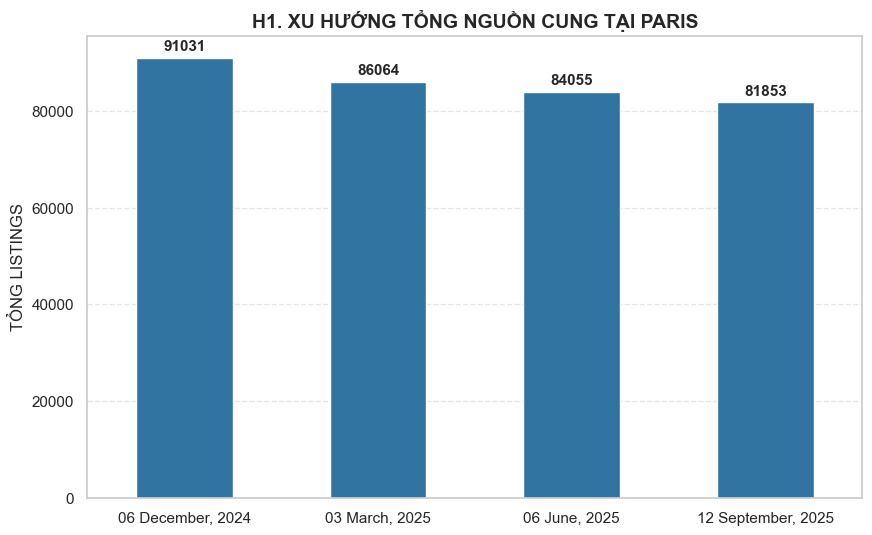

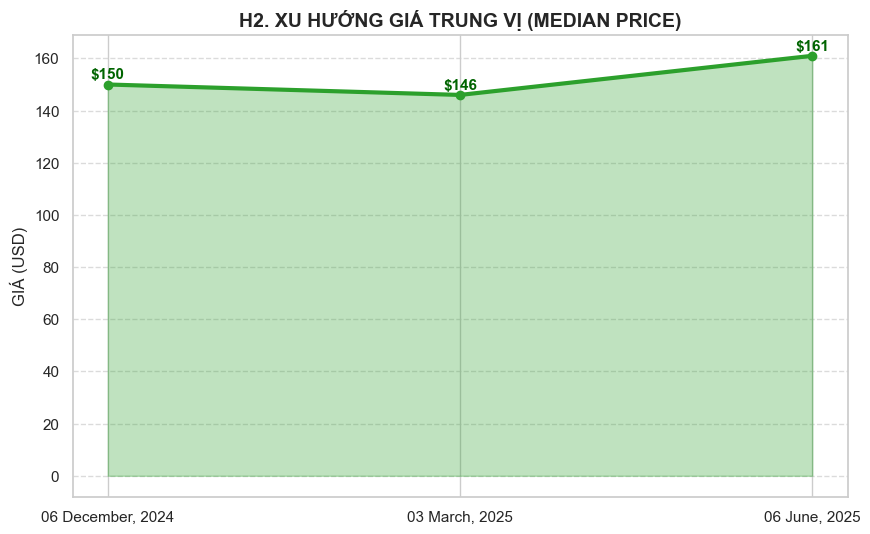

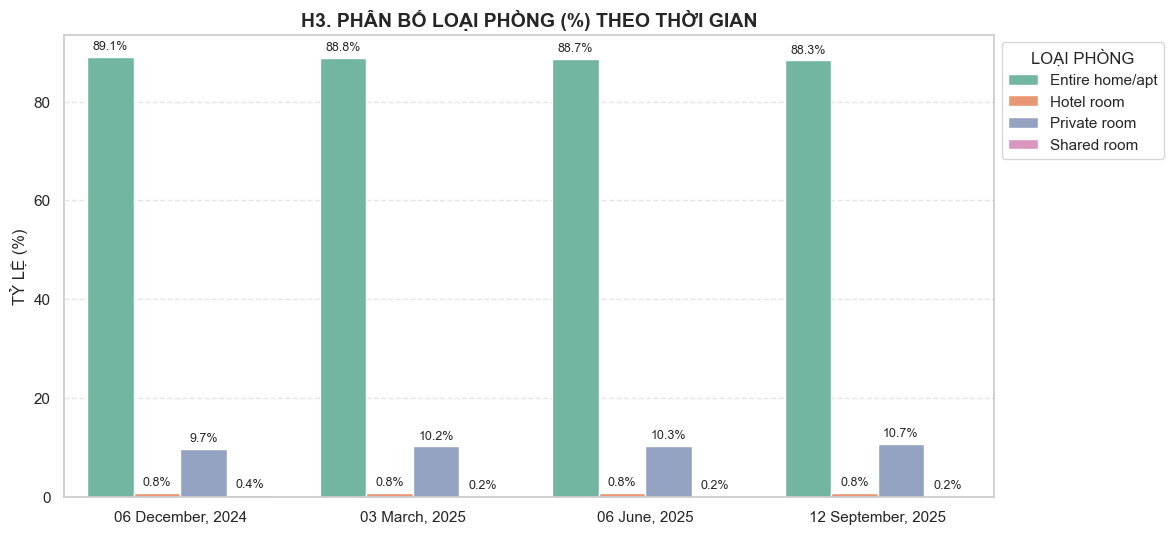

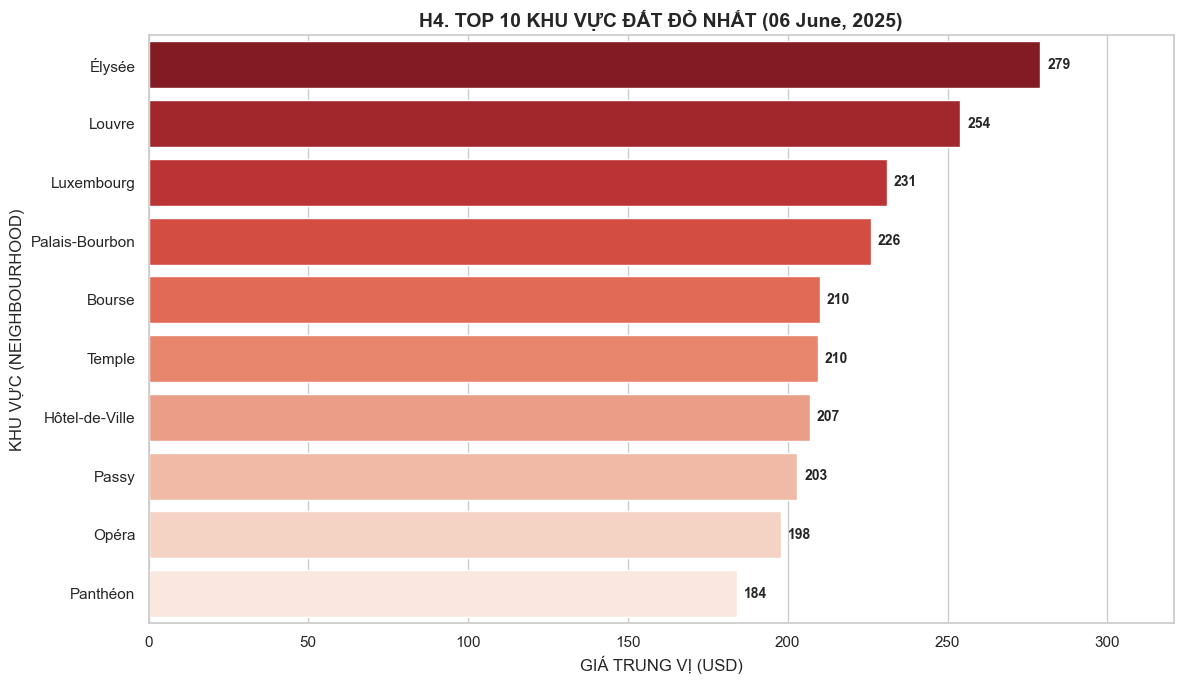

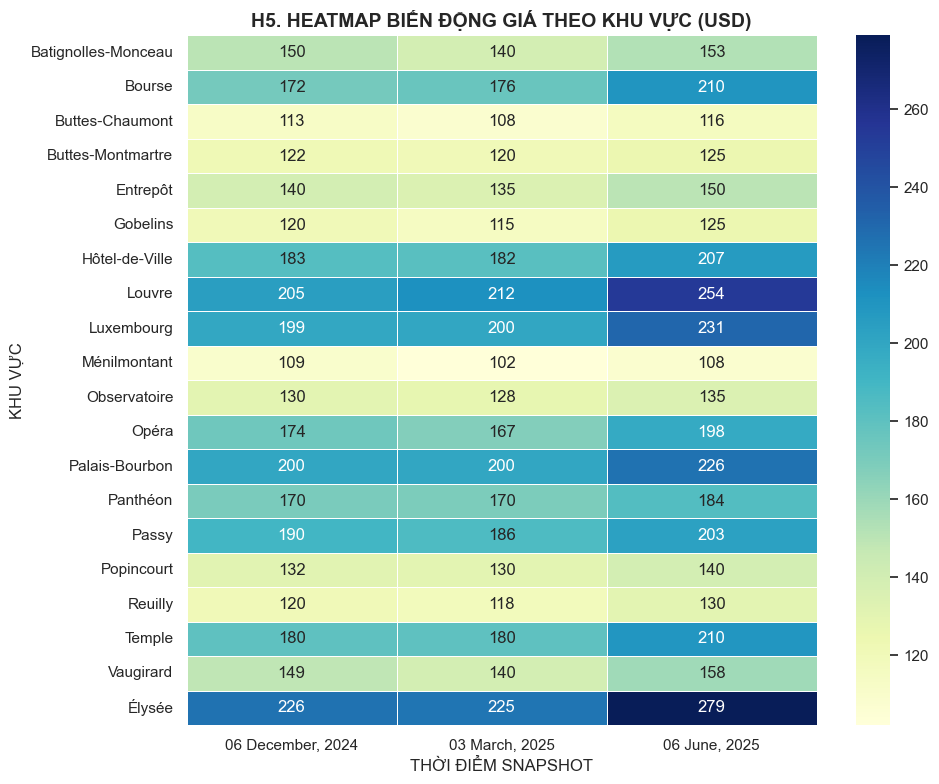

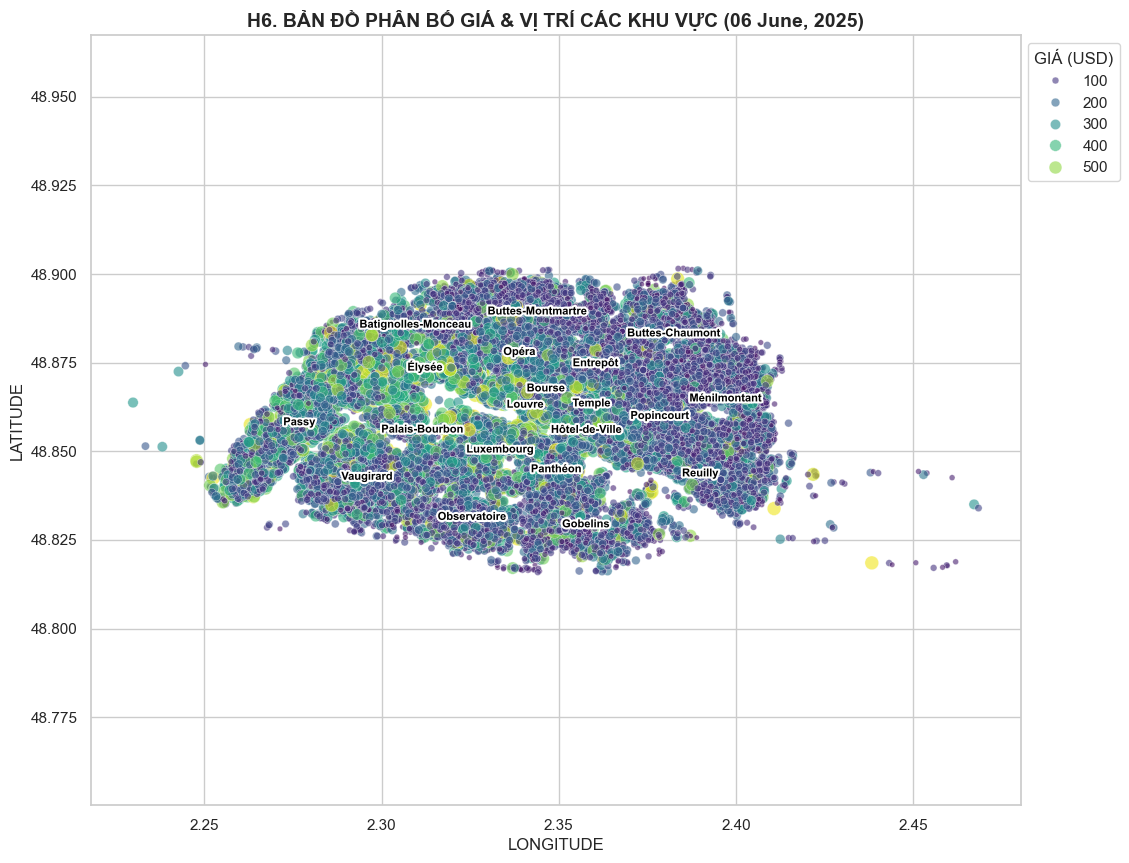


🎉 HOÀN TẤT! Kiểm tra thư mục '..\figures' để lấy file PDF.


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects

# --- 1. THIẾT LẬP ---
sns.set_theme(style="whitegrid")
BASE_DIR = '..'
PROCESSED_DIR = os.path.join(BASE_DIR, 'processed', 'paris')
FIGURES_DIR = os.path.join(BASE_DIR, 'figures')
os.makedirs(FIGURES_DIR, exist_ok=True)
CITY_SUFFIX = 'paris'

print("--- BẮT ĐẦU VẼ 6 BIỂU ĐỒ PARIS (OUTPUT: PDF) ---")

# --- 2. NẠP DỮ LIỆU ---

# A. Nạp KPI tóm tắt (Cho hình 1, 2, 3)
try:
    kpi_supply = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_supply_{CITY_SUFFIX}.csv'))
    kpi_price = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_price_{CITY_SUFFIX}.csv'))
    kpi_room = pd.read_csv(os.path.join(PROCESSED_DIR, f'kpi_room_type_{CITY_SUFFIX}.csv'))
    
    # Sắp xếp thời gian
    def sort_dates(df):
        df['dt'] = pd.to_datetime(df['snapshot_date'])
        return df.sort_values('dt').drop(columns=['dt'])
    
    kpi_supply = sort_dates(kpi_supply)
    kpi_price = sort_dates(kpi_price)
    # kpi_room xử lý sau
    print("✅ Đã nạp KPI tóm tắt.")
except Exception as e:
    print(f"❌ Thiếu file KPI. Hãy chạy File 02 trước. Lỗi: {e}")

# B. Nạp Dữ liệu chi tiết (Cho hình 4, 5, 6) - CƠ CHẾ TỰ ĐỘNG CHỌN SNAPSHOT TỐT NHẤT
# Ưu tiên tháng 9 -> nếu lỗi/thiếu thì dùng tháng 6 -> nếu lỗi thì dùng tháng 3
priority_snapshots = ['12 September, 2025', '06 June, 2025', '03 March, 2025']
TARGET_SNAPSHOT = None
df_detail = None

for snap in priority_snapshots:
    file_path = os.path.join(PROCESSED_DIR, snap, 'listings_processed.csv')
    if os.path.exists(file_path):
        try:
            # Đọc thử để xem có dữ liệu không
            temp_df = pd.read_csv(file_path, low_memory=False)
            if not temp_df.empty and 'price_numeric' in temp_df.columns:
                # Kiểm tra xem cột giá có bị rỗng toàn bộ không (lỗi dữ liệu)
                if temp_df['price_numeric'].notna().sum() > 0:
                    df_detail = temp_df
                    TARGET_SNAPSHOT = snap
                    print(f"✅ Đã nạp dữ liệu chi tiết từ snapshot: {TARGET_SNAPSHOT} ({len(df_detail)} dòng).")
                    break # Tìm thấy rồi thì dừng lại
                else:
                    print(f"⚠️ Snapshot {snap} tồn tại nhưng cột giá bị rỗng (NaN). Đang thử snapshot khác...")
        except:
            pass

if df_detail is None:
    print("❌ LỖI: Không tìm thấy bất kỳ snapshot chi tiết nào hợp lệ để vẽ bản đồ/top 10!")


# --- 3. VẼ BIỂU ĐỒ ---

# === HÌNH 1: Xu hướng Nguồn Cung (Bar Chart) ===
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=kpi_supply, x='snapshot_date', y='total_listings', color='#1f77b4', width=0.5)
plt.title('H1. XU HƯỚNG TỔNG NGUỒN CUNG TẠI PARIS', fontsize=14, fontweight='bold')
plt.ylabel('TỔNG LISTINGS')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i in ax1.containers: ax1.bar_label(i, padding=3, fontsize=11, fontweight='bold')
plt.savefig(os.path.join(FIGURES_DIR, 'paris_01_supply.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# === HÌNH 2: Xu hướng Giá (Area Chart) ===
plt.figure(figsize=(10, 6))
plt.plot(kpi_price['snapshot_date'], kpi_price['median_price'], marker='o', linewidth=3, color='#2ca02c')
plt.fill_between(kpi_price['snapshot_date'], kpi_price['median_price'], color='#2ca02c', alpha=0.3)
plt.title('H2. XU HƯỚNG GIÁ TRUNG VỊ (MEDIAN PRICE)', fontsize=14, fontweight='bold')
plt.ylabel('GIÁ (USD)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for x, y in zip(kpi_price['snapshot_date'], kpi_price['median_price']):
    plt.text(x, y + 1, f"${y:.0f}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='darkgreen')
plt.savefig(os.path.join(FIGURES_DIR, 'paris_02_price.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# === HÌNH 3: Cơ cấu Loại phòng (Grouped Bar) ===
plt.figure(figsize=(12, 6))
kpi_room['dt'] = pd.to_datetime(kpi_room['snapshot_date'])
kpi_room = kpi_room.sort_values('dt')
ax3 = sns.barplot(data=kpi_room, x='snapshot_date', y='percentage', hue='room_type', palette='Set2')
plt.title('H3. PHÂN BỐ LOẠI PHÒNG (%) THEO THỜI GIAN', fontsize=14, fontweight='bold')
plt.ylabel('TỶ LỆ (%)')
plt.xlabel('')
plt.legend(title='LOẠI PHÒNG', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i in ax3.containers: ax3.bar_label(i, fmt='%.1f%%', padding=3, fontsize=9)
plt.savefig(os.path.join(FIGURES_DIR, 'paris_03_room_type.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# --- CÁC HÌNH CẦN DỮ LIỆU CHI TIẾT ---
if df_detail is not None:
    
    # === HÌNH 4: Top 10 Khu vực Đắt đỏ nhất (Bar Chart) ===
    neigh_price = df_detail.groupby('neighbourhood_cleansed')['price_numeric'].median().sort_values(ascending=False).head(10).reset_index()

    plt.figure(figsize=(12, 7)) # Tăng chiều rộng
    ax4 = sns.barplot(
        data=neigh_price, 
        y='neighbourhood_cleansed', 
        x='price_numeric', 
        hue='neighbourhood_cleansed',  
        palette='Reds_r', 
        legend=False                   
    )
    plt.title(f'H4. TOP 10 KHU VỰC ĐẮT ĐỎ NHẤT ({TARGET_SNAPSHOT})', fontsize=14, fontweight='bold')
    plt.xlabel('GIÁ TRUNG VỊ (USD)')
    plt.ylabel('KHU VỰC (NEIGHBOURHOOD)')
    
    # Thêm nhãn số liệu
    for i in ax4.containers:
        ax4.bar_label(i, fmt='%.0f', padding=5, fontsize=10, fontweight='bold')
    
    # Nới rộng trục X để nhãn không bị che
    max_val = neigh_price['price_numeric'].max()
    if pd.notna(max_val): plt.xlim(0, max_val * 1.15)
        
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, 'paris_04_top10_price.pdf'), format='pdf', bbox_inches='tight')
    plt.show()

    # === HÌNH 5: Heatmap Giá theo Khu vực ===
    all_files = glob.glob(os.path.join(PROCESSED_DIR, '*', 'listings_processed.csv'))
    df_list = []
    for f in all_files:
        try:
            s_name = os.path.basename(os.path.dirname(f))
            # Chỉ đọc các cột cần thiết và lọc giá hợp lệ
            d = pd.read_csv(f, usecols=['neighbourhood_cleansed', 'price_numeric'])
            d = d[d['price_numeric'].notna()] # Lọc NaN
            d['snapshot'] = s_name
            df_list.append(d)
        except:
            pass
            
    if df_list:
        df_heatmap_src = pd.concat(df_list)
        top_neighs = df_heatmap_src['neighbourhood_cleansed'].value_counts().head(20).index
        df_heatmap_src = df_heatmap_src[df_heatmap_src['neighbourhood_cleansed'].isin(top_neighs)]

        heatmap_data = df_heatmap_src.groupby(['neighbourhood_cleansed', 'snapshot'])['price_numeric'].median().unstack()
        # Sắp xếp cột thời gian
        cols = sorted(heatmap_data.columns, key=lambda x: pd.to_datetime(x, errors='coerce'))
        heatmap_data = heatmap_data[cols]

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
        plt.title('H5. HEATMAP BIẾN ĐỘNG GIÁ THEO KHU VỰC (USD)', fontsize=14, fontweight='bold')
        plt.xlabel('THỜI ĐIỂM SNAPSHOT')
        plt.ylabel('KHU VỰC')
        plt.tight_layout()
        plt.savefig(os.path.join(FIGURES_DIR, 'paris_05_price_heatmap.pdf'), format='pdf', bbox_inches='tight')
        plt.show()

    # === HÌNH 6: Bản đồ Phân bố Listing (Có nhãn) ===
    plt.figure(figsize=(12, 10))
    
    # Lọc giá để biểu đồ không bị nhiễu bởi outliers
    map_data = df_detail[(df_detail['price_numeric'] > 0) & (df_detail['price_numeric'] < 600)]

    sns.scatterplot(
        data=map_data, 
        x='longitude', y='latitude', 
        hue='price_numeric', palette='viridis', 
        size='price_numeric', sizes=(10, 100), alpha=0.6,
        legend='brief'
    )

    # Tính tâm khu vực để gắn nhãn
    neigh_centers = df_detail.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean().reset_index()

    texts = []
    for i, row in neigh_centers.iterrows():
        txt = plt.text(
            row['longitude'], row['latitude'], 
            row['neighbourhood_cleansed'], 
            fontsize=8, fontweight='bold', color='black',
            ha='center', va='center'
        )
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

    plt.title(f'H6. BẢN ĐỒ PHÂN BỐ GIÁ & VỊ TRÍ CÁC KHU VỰC ({TARGET_SNAPSHOT})', fontsize=14, fontweight='bold')
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')
    plt.legend(title='GIÁ (USD)', bbox_to_anchor=(1, 1), loc='upper left')
    plt.axis('equal')

    plt.savefig(os.path.join(FIGURES_DIR, 'paris_06_map_labeled.pdf'), format='pdf', bbox_inches='tight')
    plt.show()

print(f"\n🎉 HOÀN TẤT! Kiểm tra thư mục '{FIGURES_DIR}' để lấy file PDF.")